In [206]:
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
df=pd.read_csv('titanic.csv')

In [208]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [209]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [210]:
inputs=df.drop('Survived',axis=1)

In [211]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [212]:
target=df['Survived']

In [213]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [214]:
dummies=pd.get_dummies(df.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [215]:
inputs=pd.concat([inputs,dummies],axis=1)

In [216]:
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [217]:
inputs['Age']=inputs.Age.fillna(inputs.Age.mean())

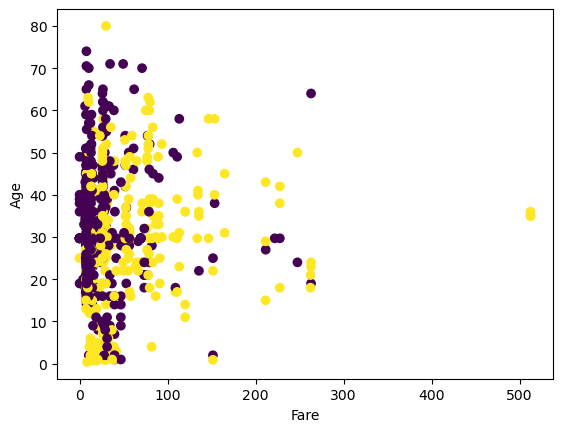

In [218]:
import matplotlib.pyplot as plt

# Assuming inputs and target are defined


# Plot the data points for each label separately
plt.scatter(inputs['Fare'],inputs['Age'],c=target)
# Adding axis labels
plt.xlabel('Fare')
plt.ylabel('Age')



# Display the plot
plt.show()


In [219]:
inputs.drop('Sex',axis=1,inplace=True)

In [220]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [221]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [223]:
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [224]:
len(X_train)

712

In [225]:
len(X_test)

179

In [226]:
model=DecisionTreeClassifier()

In [227]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [228]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [229]:
y_test

3      1
96     0
265    0
616    0
402    0
      ..
23     1
572    1
854    0
742    1
744    1
Name: Survived, Length: 179, dtype: int64

In [231]:
model.score(X_test,y_test)*100

80.44692737430168